In [1]:
import pandas as pd
from matplotlib import pyplot as plt

folder = 'H:\\My Drive\\PROJECTS\\PSI 2022-2025\\XRF fundamentals vs. MVA'

In [2]:
df = pd.read_csv(folder+'\\combined_results.csv')
# split for plotting
maj = df[:8].copy()
min1 = df[8:18].copy()
min2 = df[18:].copy()

#convert negative R2 to 0
# also some greater than 1 which probably comes from the 
# adj r2 calculation, which would be from negative values I believe
for d in [maj,min1,min2]:
    d['MVA_adj_r2']=d['MVA_adj_r2'].apply(lambda x: 0.01 if ((x<0)|(x>1)) else x)
    d['FP_adj_r2']=d['FP_adj_r2'].apply(lambda x: 0.01 if ((x<0)|(x>1)) else x)

### %RMSEP

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


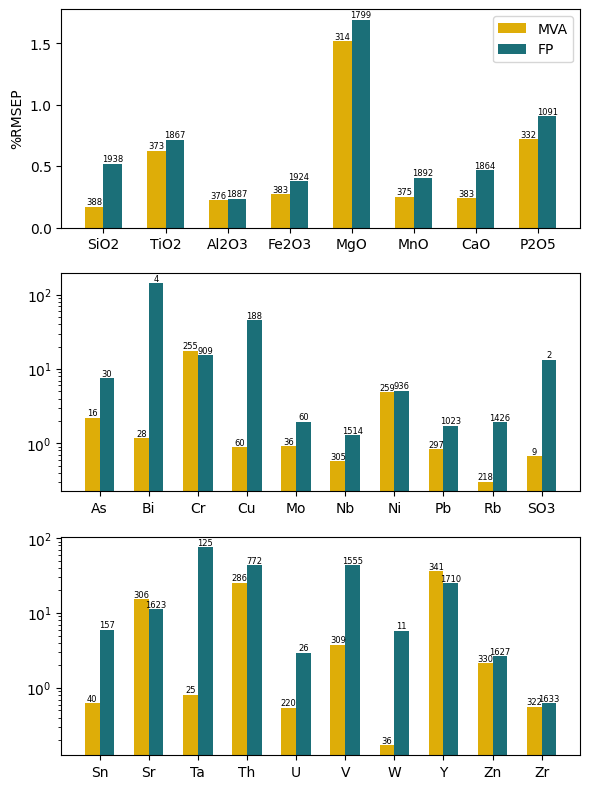

In [3]:
w=0.3

fig,ax = plt.subplots(nrows=3,
                     figsize=(6,8))
i=0
for d in [maj, min1, min2]:
    x=d.index
    x1=x-0.15
    x2=x+0.15
    m = ax[i].bar(x1, d['MVA_%rmsep'], width=w, color='#dead08', label='MVA')
    f = ax[i].bar(x2, d['FP_%rmsep'], width=w, color='#1b6f78', label='FP')
    ax[i].bar_label(m, d['MVA_n_test'], fontsize=6)
    ax[i].bar_label(f, d['FP_n_test'], fontsize=6)
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(d['element'])
    
    # set minors on log scale
    if i>0:
        ax[i].semilogy()
    else:
        ax[i].legend()
        ax[i].set_ylabel('%RMSEP')
    i+=1

plt.tight_layout()
plt.savefig(folder+'\\figures\\%RMSEP_comparison.eps', dpi=600)
plt.show()

### Adjusted R2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


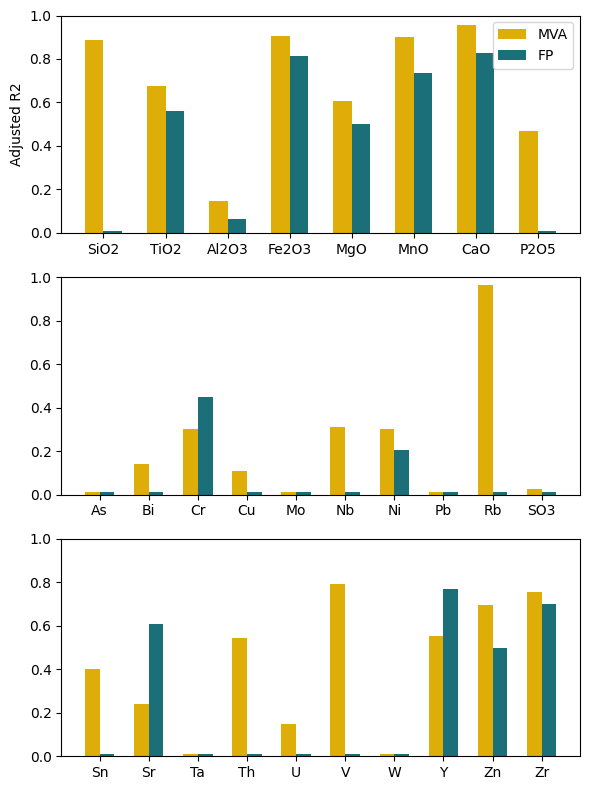

In [4]:
fig,ax = plt.subplots(nrows=3,
                     figsize=(6,8))
i=0
for d in [maj, min1, min2]:
    x=d.index
    x1=x-0.15
    x2=x+0.15
    m = ax[i].bar(x1, d['MVA_adj_r2'], width=w, color='#dead08', label='MVA')
    f = ax[i].bar(x2, d['FP_adj_r2'], width=w, color='#1b6f78', label='FP')
#    ax[i].bar_label(m, d['MVA_n_test'], fontsize=6)
#    ax[i].bar_label(f, d['FP_n_test'], fontsize=6)
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(d['element'])
    ax[i].set_ylim(0,1)
    
    # set minors on log scale
    if i==0:
        ax[i].legend()
        ax[i].set_ylabel('Adjusted R2')
    i+=1

plt.tight_layout()
plt.savefig(folder+'\\figures\\Adj_r2_comparison.eps', dpi=600)
plt.show()

### scatter plots